# Feature Engineering 

The exploratory data analysis section showed that oil producing countries have a high correlation to each other. To simplify our features all oil producers will be averaged and combined into a single feature

# Imports 

In [1]:
import pandas as pd
import sys 
import os 

# sys.path.insert(0,'/Users/andre/Desktop/Code/Quant_Trading/oil_model/utils/') 
# Path needs to be added manually to read from another folder
path2add = os.path.normpath(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir, "utils"))
)
if not (path2add in sys.path):
    sys.path.append(path2add)

from cleaning import oil_api_keys
from feature_engineering import *


In [2]:
features_df = pd.read_csv("../data/cleaned_dataset.csv")
features_df.set_index(features_df['Date'],inplace=True)
features_df.drop(columns='Date',inplace=True)

In [3]:
features_df

,crude_price,sp_500,vix,usd,libya_oil_production,kazak_oil_production,qatar_oil_production,iran_oil_production,kuwait_oil_production,uae_oil_production,saudi_oil_production,iraq_oil_production,usa_oil_production,world_oil_consumption
Date,,,,,,,,,,,,,,
2002-01-01,20.605000,1155.2500,22.270000,117.885000,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,5873000.0,43650.734
2002-01-02,21.010000,1154.0000,22.709999,116.269997,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,5873000.0,43650.734
2002-01-03,20.370001,1166.7500,21.340000,116.540001,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,5873000.0,43650.734
2002-01-04,21.620001,1175.2500,20.450001,116.750000,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,5873000.0,43650.734
2002-01-05,20.710001,1161.3125,22.075000,116.692499,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,5873000.0,43650.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,76.930000,3846.0000,22.900000,104.311996,1.179167e+06,1.848760e+06,574000.0000,3.117986e+06,2.590667e+06,2951000.0,9.612583e+06,4.118417e+06,12611000.0,53494.272
2023-01-04,72.839996,3874.5000,22.010000,104.021004,1.179167e+06,1.848760e+06,574000.0000,3.117986e+06,2.590667e+06,2951000.0,9.612583e+06,4.118417e+06,12611000.0,53561.130
2023-01-05,73.669998,3829.0000,22.459999,104.828003,1.179167e+06,1.848760e+06,574000.0000,3.117986e+06,2.590667e+06,2951000.0,9.612583e+06,4.118417e+06,12611000.0,53672.560


In [4]:
features_df = oil_production_feature(features_df, oil_api_keys)
features_df

,crude_price,sp_500,vix,usd,usa_oil_production,world_oil_consumption,world_oil_production
Date,,,,,,,
2002-01-01,20.605000,1155.2500,22.270000,117.885000,5873000.0,43650.734,2.751066e+06
2002-01-02,21.010000,1154.0000,22.709999,116.269997,5873000.0,43650.734,2.751066e+06
2002-01-03,20.370001,1166.7500,21.340000,116.540001,5873000.0,43650.734,2.751066e+06
2002-01-04,21.620001,1175.2500,20.450001,116.750000,5873000.0,43650.734,2.751066e+06
2002-01-05,20.710001,1161.3125,22.075000,116.692499,5873000.0,43650.734,2.751066e+06
...,...,...,...,...,...,...,...
2023-01-03,76.930000,3846.0000,22.900000,104.311996,12611000.0,53494.272,4.289287e+06
2023-01-04,72.839996,3874.5000,22.010000,104.021004,12611000.0,53561.130,4.289287e+06
2023-01-05,73.669998,3829.0000,22.459999,104.828003,12611000.0,53672.560,4.289287e+06


In [80]:
features_df.rolling(window=7).mean()

,crude_price,sp_500,vix,usd,world_oil_consumption,world_oil_production
Date,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-01-03,78.916072,3847.526786,21.903571,103.792355,53487.904571,4.305215e+06
2023-01-04,78.041786,3857.098214,21.885000,103.769356,53535.660286,4.301233e+06
2023-01-05,77.366071,3850.991071,22.030714,103.946785,53599.334571,4.297251e+06


In [76]:
features_df.to_csv('../data/feature_engineered_dataset.csv')

In [77]:
from eda import *

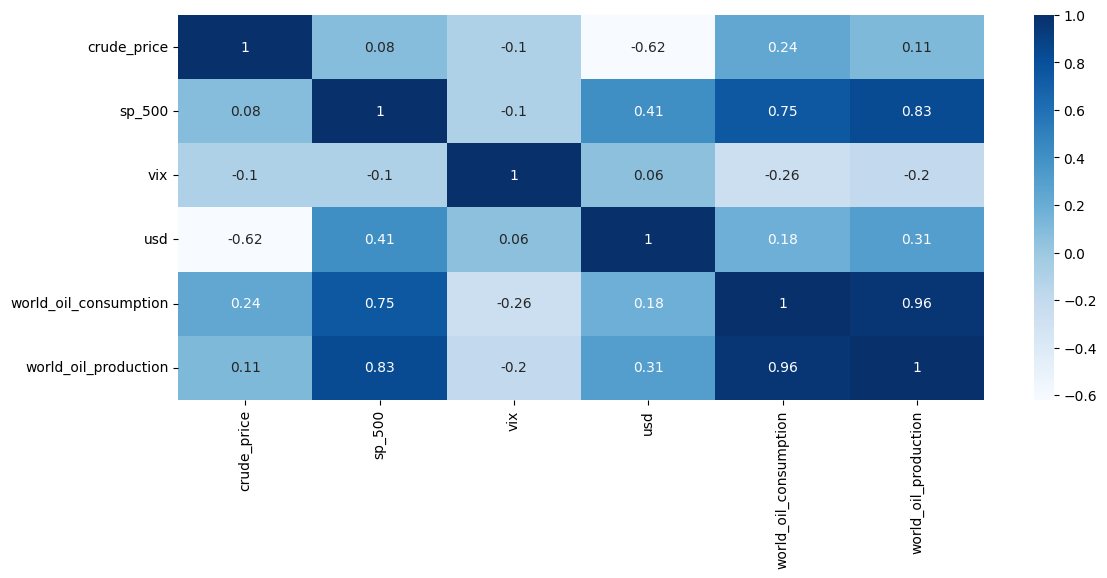

In [78]:
heat_map(features_df)